In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("minimal_incom.xlsx")
df

,standart_incom,housing,Clothing_haircut,health,Household_expenses,food,insurance,Education_culture,Additional_products_services,Commissions,Transport_Communication,Savings
0,8218.666667,4519,1575,2143,942,5300,0,3049,1511,0,6918,0
1,3655.500000,3171,350,200,360,1600,181,0,250,0,466,0
2,3176.470588,3700,850,350,600,2800,60,850,550,100,1710,0
3,4026.666667,1784,423,469,665,2833,1930,878,1303,0,1227,0
4,4987.368421,900,965,1080,1700,5940,640,4663,4085,50,4457,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10129,2560.000000,3000,800,840,400,1200,158,3485,850,65,1820,0
10130,4863.750000,2355,1432,160,360,2800,532,4904,2813,260,2800,1000
10131,4247.500000,4336,550,0,700,3079,124,350,650,0,300,0
10132,7578.125000,7836,1580,190,1250,4000,891,5810,2000,82,0,0


## split standart_incom to 20 category

In [11]:
df["standart_incom"] = round(df["standart_incom"])

In [13]:
pd.cut(df["standart_incom"], 20)

0        (7684.25, 9145.7]
1        (3299.9, 4761.35]
2        (1838.45, 3299.9]
3        (3299.9, 4761.35]
4        (4761.35, 6222.8]
               ...        
10129    (1838.45, 3299.9]
10130    (4761.35, 6222.8]
10131    (3299.9, 4761.35]
10132    (6222.8, 7684.25]
10133    (4761.35, 6222.8]
Name: standart_incom, Length: 10134, dtype: category
Categories (20, interval[float64, right]): [(347.771, 1838.45] < (1838.45, 3299.9] < (3299.9, 4761.35] < (4761.35, 6222.8] ... (23760.2, 25221.65] < (25221.65, 26683.1] < (26683.1, 28144.55] < (28144.55, 29606.0]]

In [38]:
df["standart_incom"] = pd.cut(df["standart_incom"], 20)
df

,standart_incom,housing,Clothing_haircut,health,Household_expenses,food,insurance,Education_culture,Additional_products_services,Commissions,Transport_Communication,Savings
0,"(7684.25, 9145.7]",4519,1575,2143,942,5300,0,3049,1511,0,6918,0
1,"(3299.9, 4761.35]",3171,350,200,360,1600,181,0,250,0,466,0
2,"(1838.45, 3299.9]",3700,850,350,600,2800,60,850,550,100,1710,0
3,"(3299.9, 4761.35]",1784,423,469,665,2833,1930,878,1303,0,1227,0
4,"(4761.35, 6222.8]",900,965,1080,1700,5940,640,4663,4085,50,4457,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10129,"(1838.45, 3299.9]",3000,800,840,400,1200,158,3485,850,65,1820,0
10130,"(4761.35, 6222.8]",2355,1432,160,360,2800,532,4904,2813,260,2800,1000
10131,"(3299.9, 4761.35]",4336,550,0,700,3079,124,350,650,0,300,0
10132,"(6222.8, 7684.25]",7836,1580,190,1250,4000,891,5810,2000,82,0,0


In [69]:
df_means = df.groupby(by ="standart_incom").mean()
df_means.reset_index(inplace = True)
df_means = df_means.drop(index = 16)
df_means

,standart_incom,housing,Clothing_haircut,health,Household_expenses,food,insurance,Education_culture,Additional_products_services,Commissions,Transport_Communication,Savings
0,"(347.771, 1838.45]",1966.318021,347.798587,320.568905,530.696113,1891.996466,224.222615,942.763251,761.844523,61.583039,812.286219,77.508834
1,"(1838.45, 3299.9]",2661.973638,535.817809,413.831869,633.911541,2472.198008,300.879320,1564.670182,1266.128295,111.645577,1219.951377,146.705917
2,"(3299.9, 4761.35]",3394.132591,683.904610,457.700477,710.065819,2743.555485,412.082989,2255.624483,1595.573291,128.759300,1560.015262,203.530048
3,"(4761.35, 6222.8]",3999.549695,823.638680,548.974525,816.191604,2883.222103,569.571224,2857.212056,1964.596699,139.297452,1781.965913,269.166128
4,"(6222.8, 7684.25]",4776.816944,966.057489,639.580182,945.839637,3118.540091,680.822995,3430.304085,2411.697428,143.784418,2031.451589,358.301059
5,"(7684.25, 9145.7]",5328.942574,1107.021782,725.114851,1034.540594,3214.796040,796.116832,3703.744554,2898.257426,150.291089,2098.968317,409.609901
6,"(9145.7, 10607.15]",5727.570732,1188.009756,885.073171,1129.926829,3257.517073,843.336585,3754.873171,3233.921951,177.858537,2276.819512,586.034146
7,"(10607.15, 12068.6]",6166.186813,940.846154,968.846154,1597.714286,3317.868132,661.362637,3385.857143,3461.021978,131.175824,2158.000000,308.692308
8,"(12068.6, 13530.05]",6709.526316,1153.421053,1158.657895,1259.184211,2858.421053,859.763158,3185.710526,3262.315789,143.263158,2128.657895,354.421053
9,"(13530.05, 14991.5]",5894.272727,1257.090909,1186.954545,1430.727273,3782.772727,1066.727273,3122.181818,4187.590909,160.136364,2280.318182,440.363636


In [79]:
y_val = df_means["housing"]
y_val = np.array(y_val)

In [86]:
x_val = df_means["standart_incom"]
x_val = np.array(x_val)


In [87]:
x_val, y_val

(array([Interval(347.771, 1838.45, closed='right'),
        Interval(1838.45, 3299.9, closed='right'),
        Interval(3299.9, 4761.35, closed='right'),
        Interval(4761.35, 6222.8, closed='right'),
        Interval(6222.8, 7684.25, closed='right'),
        Interval(7684.25, 9145.7, closed='right'),
        Interval(9145.7, 10607.15, closed='right'),
        Interval(10607.15, 12068.6, closed='right'),
        Interval(12068.6, 13530.05, closed='right'),
        Interval(13530.05, 14991.5, closed='right'),
        Interval(14991.5, 16452.95, closed='right'),
        Interval(16452.95, 17914.4, closed='right'),
        Interval(17914.4, 19375.85, closed='right'),
        Interval(19375.85, 20837.3, closed='right'),
        Interval(20837.3, 22298.75, closed='right'),
        Interval(22298.75, 23760.2, closed='right'),
        Interval(25221.65, 26683.1, closed='right'),
        Interval(26683.1, 28144.55, closed='right'),
        Interval(28144.55, 29606.0, closed='right')], dtyp

Text(0.5, 1.0, 'housing by standart_incom')

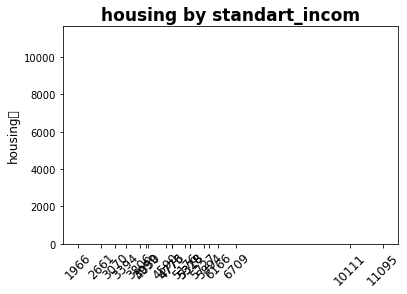

In [84]:
plt.bar(x_val, y_val)
plt.xticks(x_val, rotation=45, fontsize='12')
plt.ylabel("housing	",fontsize='12' )
plt.title("housing by standart_incom", fontweight='bold', fontsize='17')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

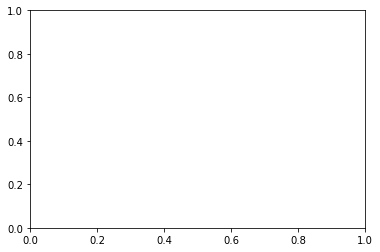

In [41]:
columns = df_means.columns[1:]
for i in columns:
    plt.bar(x_val, df_means[columns])
    plt.xticks(x_val, rotation=45, fontsize='12')
    plt.ylabel(columns,fontsize='12' )
    plt.title(columns&"by standart_incom", fontweight='bold', fontsize='17')